In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pyrocko.moment_tensor as mtm
from pyrocko.plot import beachball
from scipy.interpolate import interp1d

### Takeoff angle
<img src="https://www.induced.pl/wp-content/uploads/focimt_coordinates.png">

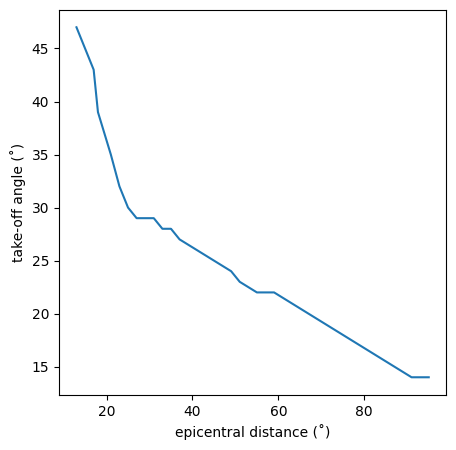

In [70]:
# Linearly interpolate the epicentral distance and take-off angles
epi = [13, 15, 17, 18, 21, 23, 25, 27, 29, 31, 33, 35, 37, 41, 45, 49, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87, 91, 95]
tko = [47, 45, 43, 39, 35, 32, 30, 29, 29, 29, 28, 28, 27, 26, 25, 24, 23, 22, 22, 21, 20, 19, 18, 17, 16, 15, 14, 14]
lin_intp = interp1d(epi,tko)
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(epi,tko)
ax.set_xlabel("epicentral distance (˚)")
ax.set_ylabel("take-off angle (˚)")
# plt.savefig("interp.png", dpi=200)
plt.show()


In [18]:
# Predict a take-off angle given an epicentral distance
new_epi = 14
print(f"The interpolated takeoff angle is {lin_intp(new_epi):.0f}˚")

The interpolated takeoff angle is 46˚


### Plot the focal mechanisms on a beachball

In [42]:
sid = ["NEW", "GW01", "GW02", "GW03", "HKT", "GW05", "GW04", "FFC", "GW08", "GW10", "DWPF", "COLA", "PAYG", "SJG", "GW06", "GW09", "NNA", "GW07", "YAK", "ESK", "KONO", "GW11"]
epd = [14, 18, 18, 18, 18, 19, 19, 23, 25, 25, 30, 36, 43, 47, 55, 55, 59, 67, 70, 74, 76, 87]
azi = [358, 65, 147, 160, 99, 250, 336, 22, 62, 240, 92, 338, 140, 97, 232, 254, 134, 160, 333, 33, 25, 224]
pol = [-1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1]
df = pd.DataFrame({"Station":sid, "Epi. dist": epd, "Azimuth": azi, "Polarity":pol})
df["Takeoff"] = np.around(lin_intp(df["Epi. dist"]))
df["Plunge"] = 90-df["Takeoff"]

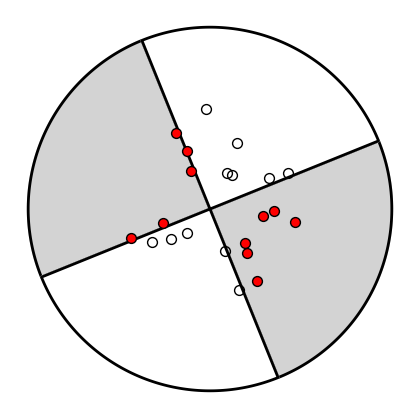

In [69]:
# setup figure with aspect=1.0/1.0, ranges=[-1.1, 1.1]
fig = plt.figure(figsize=(4., 4.))  # size in inch
fig.subplots_adjust(left=0., right=1., bottom=0., top=1.)
ax = fig.add_subplot(1, 1, 1, aspect=1.0)
ax.set_axis_off()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Best solution
strike = 338.
dip = 90.
rake = 0.

projection = 'lambert'

mt = mtm.as_mt((strike, dip, rake))
beachball.plot_beachball_mpl(
    mt, ax, position=(0., 0.),
    size=2.0, projection=projection,
    color_t="white", color_p = "lightgray",
    size_units='data')

for idx,row in df.iterrows():
    takeoff= row.Takeoff
    azi = row.Azimuth
    polarity = np.sign(row.Polarity)

    # to spherical coordinates, r, theta, phi in radians
    # flip direction when takeoff is upward
    rtp = np.array([[
        1.0 if takeoff <= 90. else -1.,
        np.deg2rad(takeoff),
        np.deg2rad(90.-azi)]])
    # to 3D coordinates (x, y, z)
    points = beachball.numpy_rtp2xyz(rtp)

    # project to 2D with same projection as used in beachball
    x, y = beachball.project(points, projection=projection).T

    ax.plot(x, y, 'o', ms=10./np.sqrt(2.),
            mew=1.0, mec='black', mfc='none' if polarity < 0.0 else 'red')

# plt.savefig("fms.png",dpi=200)
plt.show()